# Dimensional Reduction
G. Richards (2016), based on materials from Ivezic, Connolly, Leighly, and VanderPlas

To get some of the examples to work, you'll need to edit a line in one of the astroML files.  Specifically do this:

> find . -name “sdss_corrected_spectra.py” -print

> ./anaconda/lib/python2.7/site-packages/astroML/datasets/sdss_corrected_spectra.py

> emacs -nw ./anaconda/lib/python2.7/site-packages/astroML/datasets/sdss_corrected_spectra.py 

> #DATA_URL = 'http://www.astro.washington.edu/users/vanderplas/spec4000.npz'                                                                           

> DATA_URL = 'http://staff.washington.edu/jakevdp/spec4000.npz'

## Curse of Dimensionality

You want to buy a car.  Right now--you don't want to wait.  But you are picky and have certain things that you would like it to have.  Each of those things has a probability between 0 and 1 of being on the the car dealer's lot.  You want a red car which has a probability of being on the lot of $p_{\rm red}$; you want good gas mileage, $p_{\rm gas}$; you want leather seats, $p_{\rm leather}$; and you want a sunroof, $p_{\rm sunroof}$.  The probability that the dealer has a car on the lot that meets all of those requirements is 
$$p_{\rm red} \, p_{\rm gas} \, p_{\rm leather} \, p_{\rm sunroof},$$
or $p^n$ where $n$ is the number of features (assuming equal probability for each).

If the probability of each of these is 50%, then the probability of you driving off with your car of choice is only $0.5*0.5*0.5*0.5 = 0.0625$.  Not very good.  Imagine if you also wanted other things.  This is the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

Below we see an illustration of what happens when we split a distribution of random numbers in half (like for our car example) with each increasing dimension.

![http://www.newsnshit.com/curse-of-dimensionality-interactive-demo/](http://i1.wp.com/www.newsnshit.com/wp-content/uploads/2014/10/580f1__Curse-of-dimensionality-620x549.png?resize=620%2C549)

Mathematically we can describe this as: the more dimensions that your data span, the more points needed to uniformly sample the space.  

For $D$ dimensions with coordinates $[-1,1]$, the fraction of points in a unit hypersphere (with radius $r$) is
$$f_D = \frac{V_D(r)}{(2r)^D} = \frac{\pi^{D/2}}{D2^{D-1}\Gamma(D/2)}$$
which goes to $0$ as $D$ goes to infinity!  Actually, as you can see from the plot below, it is effectively 0 much earlier than that!

In [ ]:
# Execute this cell
# from Andy Connolly
%matplotlib inline
import numpy as np
import scipy.special as sp
from matplotlib import pyplot as plt

def unitVolume(dimension, radius=1.):
    return 2*(radius**dimension *np.pi**(dimension/2.))/(dimension*sp.gamma(dimension/2.))

dim = np.linspace(1,100)

#------------------------------------------------------------
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dim,unitVolume(dim)/2.**dim)

ax.set_yscale('log')
ax.set_xlabel('$Dimension$')
ax.set_ylabel('$Volume$')

plt.show()

Note that this works in the opposite direction too: let's say you want to find "rare" objects in 10 dimensions, where we'll define rare as <1% of the population.  Then you'll need to accept objects from 63% of the distribution in all 10 dimensions!  So are those really "rare" or are they just a particular 1% of the population?

In [7]:
import numpy as np
p = 10**(np.log10(0.01)/10.0)
print p

0.63095734448


N.B.  Dimensionality isn't just measuring $D$ parameters for $N$ objects.  It could be a spectrum with $D$ values or an image with $D$ pixels, etc.  In the book the examples used just happen to be spectra of galaxies from the SDSS project.  But we can insert the data of our choice instead.

For example: the SDSS comprises a sample of 357 million sources: 
- each source has 448 measured attributes
- selecting just 30 (e.g., magnitude, size..) and normalizing the data range $-1$ to $1$

yields a probability of having one of the 357 million sources reside within a unit hypersphere of 1 in 1.4$\times 10^5$.

## Principal Component Analysis (PCA)

In [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) we seek to take a data set like the one shown below and apply a transform to the data such that the new axes are aligned with the maximal variance of the data.  As can be seen in the Figure, this is basically just the same as doing regression by minimizing the square of the perpendicular distances to the new axes.  Note that we haven't made any changes to the data, we have just defined new axes.  

In [ ]:
# Execute this cell
# Ivezic, Figure 7.2
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse

#------------------------------------------------------------
# Set parameters and draw the random sample
np.random.seed(42)
r = 0.9

sigma1 = 0.25
sigma2 = 0.08
rotation = np.pi / 6
s = np.sin(rotation)
c = np.cos(rotation)

X = np.random.normal(0, [sigma1, sigma2], size=(100, 2)).T
R = np.array([[c, -s],[s, c]])
X = np.dot(R, X)

#------------------------------------------------------------
# Plot the diagram
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = plt.axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)

# draw axes
ax.annotate(r'$x$', (-r, 0), (r, 0),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))
ax.annotate(r'$y$', (0, -r), (0, r),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))

# draw rotated axes
ax.annotate(r'$x^\prime$', (-r * c, -r * s), (r * c, r * s),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))
ax.annotate(r'$y^\prime$', (r * s, -r * c), (-r * s, r * c),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))

# scatter points
ax.scatter(X[0], X[1], s=25, lw=0, c='k', zorder=2)

# draw lines
vnorm = np.array([s, -c])
for v in (X.T):
    d = np.dot(v, vnorm)
    v1 = v - d * vnorm
    ax.plot([v[0], v1[0]], [v[1], v1[1]], '-k')

# draw ellipses
for sigma in (1, 2, 3):
    ax.add_patch(Ellipse((0, 0), 2 * sigma * sigma1, 2 * sigma * sigma2,
                         rotation * 180. / np.pi,
                         ec='k', fc='gray', alpha=0.2, zorder=1))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

Note that the points are correlated along a particular direction which doesn't align with the initial choice of axes.  So, we should rotate our axes to align with this correlation. 

We'll choose the rotation to maximize the ability to discriminate between the data points:
*   the first axis, or **principal component**, is direction of maximal variance
*   the second principal component is orthogonal to the first component and maximizes the residual variance
*   ...

PCA is a dimensional reduction process because we can generally account for nearly "all" of the variance in the data set with fewer than the original $K$ dimensions.  See more below.

We start with a data set $\{x_i\}$ which consists of $N$ objects for which we measure $K$ features.  We start by subtracting the mean for each feature in $\{x_i\}$ and write $X$ as a $N\times K$ matrix.

The covariance of this matrix is 
$$C_X=\frac{1}{N-1}X^TX.$$

There are off-diagonal terms if there are correlations between the measurements (e.g., maybe two of the features are temperature dependent and the measurements were taken at the same time).


If $R$ is a projection of the data that is aligned with the maximal variance, then we have $Y= X R$ with covariance 

$$ C_{Y} = R^T X^T X R = R^T C_X R.$$

$r_1$ is the first principal component of $R$, which can be derived using Langrange multipliers with the following cost function:

$$ \phi(r_1,\lambda_1) = r_1^TC_X r_1 - \lambda_1(r_1^Tr_1-1). $$

If we take derivative of $\phi(r_1,\lambda)$ with respect to $r_1$ and set it to 0, then we have

$$ C_Xr_1 - \lambda_1 r_1 = 0. $$

$\lambda_1$ (the largest eigenvalue of the matrix) is the root of the equation $\det(C_X -
\lambda_1 {\bf I})=0$ for which the eigenvalue is

$$ \lambda_1 =  r_1^T C_X r_1.$$

The columns of the full matrix, $R$ are the eigenvectors (known here as principal components).

We aren't going to go through the linear algebra more than that here.  But it would be a good group project for someone.  See the end of 7.3.1 starting at the bottom on page 294 or go through [Karen Leighly's PCA lecture notes](http://seminar.ouml.org/lectures/principal-components-analysis/) if you want to walk through the math in more detail.

### Preparing data for PCA

   * Subtract the mean of each dimension (to "center" the data)
   * Divide by the variance in each dimension (to "whiten" the data)
   * (For spectra and images) normalize each row to yield an integral of unity.



In [4]:
#Example call from 7.3.2
import numpy as np
from sklearn.decomposition import PCA

X = np.random.normal(size=(100,3)) # 100 points in 3D
R = np.random.random((3,10)) # projection matrix
X = np.dot(X,R) # X is now 10-dim, with 3 intrinsic dims
pca = PCA(n_components=4) # n_components can be optionally set
pca.fit(X) 
comp = pca.transform(X) # compute the subspace projection of X
mean = pca.mean_ # length 10 mean of the data
components = pca.components_ # 4x10 matrix of components

[Scikit-Learn's decomposition module](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) has a number of [PCA type implementations](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).
Let's work through an example using spectra of galaxies take during the Sloan Digital Sky Survey.  In this sample there are 4000 spectra with flux measurements in 1000 bins.  15 example spectra are shown below and our example will use half of the spectra chosen at random.  

![Ivezic, Figure 7.1](http://www.astroml.org/_images/fig_spec_examples_1.png)

In [ ]:
%matplotlib inline
# Example from Andy Connolly
# See Ivezic, Figure 7.4
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
print len(spectra), len(wavelengths)

#----------------------------------------------------------------------
# Compute PCA
np.random.seed(500)
nrows = 2000 # We'll just look at 2000 random spectra
n_components = 5 # Do the fit with 5 components, which is the mean plus 4
ind = np.random.randint(spectra.shape[0], size=nrows)

spec_mean = spectra[ind].mean(0) # Compute the mean spectrum, which is the first component
# spec_mean = spectra[:50].mean(0)

# use Randomized PCA for speed
pca = RandomizedPCA(n_components - 1)
pca.fit(spectra[ind])
pca_comp = np.vstack([spec_mean,pca.components_]) #Add the mean to the components
evals = pca.explained_variance_ratio_ 
print evals # Print the eigenvalues

Now let's plot the components.  See also Ivezic, Figure 7.4.  The left hand panels are just the first 5 spectra for comparison with the first 5 PCA components, which are shown on the right.  They are ordered by the size of their eigenvalues.

In [ ]:
#Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = 'PCA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel('wavelength (Angstroms)')
    ax.plot(wavelengths, pca_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
    
    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel('wavelength (Angstroms)')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax.set_title(titles, fontsize='medium')

    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')


plt.show()

Now let's make "scree" plots.  These plots tell us how much of the variance is explained as a function of the each eigenvector.  Our plot won't look much like Ivezic, Figure 7.5, so I've shown it below to explain where "scree" comes from.
![Ivezic, Figure 7.5](http://www.astroml.org/_images/fig_eigenvalues_1.png)

In [ ]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(121)
ax.plot(np.arange(n_components-1), evals)
ax.set_xlabel("eigenvalue number")
ax.set_ylabel("eigenvalue ")

ax = fig.add_subplot(122)
ax.plot(np.arange(n_components-1), evals.cumsum())
ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative eigenvalue")

plt.show()

How much of the variance is explained by the first two components?  How about all of the components?

In [ ]:
print("The first component explains {:.3f} of the variance in the data.".format(# Complete
print("The second component explains {:.3f} of the variance in the data.".format(# Complete
print("All components explain {:.3f} of the variance in the data.".format(# Complete

This is why PCA enables dimensionality reduction.

How many components would we need to explain 99.5% of the variance?  

In [ ]:
for num_feats in np.arange(1,20, dtype = int):
    # complete
print("{:d} features are needed to explain 99.5% of the variance".format(# Complete

Note that we would need 1000 components to encode *all* of the variance.  

## Interpreting the PCA

- The output eigenvectors are ordered by their associated eigenvalues 
- The eigenvalues reflect the variance within each eigenvector
- The sum of the eigenvalues is total variance of the system
- Projection of each spectrum onto the first few eigenspectra is a compression of the data 

Once we have the eigenvectors, we can try to reconstruct an observed spectrum, ${x}(k)$, in the eigenvector basis, ${e}_i(k)$, as 

$$ \begin{equation}
  {x}_i(k) = {\mu}(k) + \sum_j^R \theta_{ij} {e}_j(k).
\end{equation}
$$

That would give a full (perfect) reconstruction of the data since it uses all of the eigenvectors.  But if we truncate (i.e., $r<R$), then we will have reduced the dimensionality while still reconstructing the data with relatively little loss of information.

For example, we started with 4000x1000 floating point numbers.  If we can explain nearly all of the variance with 8 eigenvectors, then we have reduced the problem to 4000x8+8x1000 floating point numbers!

Execute the next cell to see how the reconstruction improves by adding more components.

In [ ]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(spectra)
#evals = pca.explained_variance_ratio_
#evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = data['evecs']
spec_mean = spectra.mean(0)

#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra[1]
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

### Caveats I

PCA is a linear process, whereas the variations in the data may not be.  So it may not always be appropriate to use and/or may require a relatively large number of components to fully describe any non-linearity.

Note also that PCA can be very impractical for large data sets which exceed the memory per core as the computational requirement goes as $\mathscr{O}(D^3$) and the memory requirement goes as $\mathscr{O}(2D^2)$.

### Missing Data
We have assumed so far that there is no missing data (e.g., bad pixels in the spectrum, etc.).  But often the data set is incomplete.  Since PCA encodes the flux correlation with wavelength (or whatever parameters are in your data set), we can actually use it to determine missing values.  

An example is shown below.  Here, black are the observed spectra.  Gray are the regions where we have no data.  Blue is the PCA reconstruction, including the regions where there are no data.  Awesome, isn't it?

In [ ]:
# Execute this cell
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets import sdss_corrected_spectra

#------------------------------------------------------------
# Get spectra and eigenvectors used to reconstruct them
data = fetch_sdss_corrected_spectra()
spec = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)
evecs = data['evecs']
mu = data['mu']
norms = data['norms']
mask = data['mask']

#------------------------------------------------------------
# plot the results
i_plot = ((lam > 5750) & (lam < 6350))
lam = lam[i_plot]

specnums = [20, 8, 9]
subplots = [311, 312, 313]

fig = plt.figure(figsize=(8, 10))
fig.subplots_adjust(hspace=0)

for subplot, i in zip(subplots, specnums):
    ax = fig.add_subplot(subplot)

    # compute eigen-coefficients
    spec_i_centered = spec[i] / norms[i] - mu
    coeffs = np.dot(spec_i_centered, evecs.T)

    # blank out masked regions
    spec_i = spec[i]
    mask_i = mask[i]
    spec_i[mask_i] = np.nan

    # plot the raw masked spectrum
    ax.plot(lam, spec_i[i_plot], '-', color='k', lw=2,
            label='True spectrum')

    # plot two levels of reconstruction
    for nev in [10]:
        if nev == 0:
            label = 'mean'
        else:
            label = 'N EV=%i' % nev
        spec_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
        ax.plot(lam, spec_i_recons[i_plot], label=label)

    # plot shaded background in masked region
    ylim = ax.get_ylim()
    mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
    plt.fill(np.concatenate([lam[:1], lam, lam[-1:]]),
             np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
             lw=0, fc='k', alpha=0.2)

    ax.set_xlim(lam[0], lam[-1])
    ax.set_ylim(ylim)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

    if subplot == 311:
        ax.legend(loc=1, prop=dict(size=14))

    ax.set_xlabel('$\lambda\ (\AA)$')
    ax.set_ylabel('normalized flux')

plt.show()

The example that we have been using above is "spectral" PCA.  Some examples from the literature include:
- [Francis et al. 1992](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1992ApJ...398..476F&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)
- [Connolly et al. 1995](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1995AJ....110.1071C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)
- [Yip et al. 2004](http://iopscience.iop.org/article/10.1086/425626/meta;jsessionid=31BB5F11B85D2BF4180834DC71BA0B85.c3.iopscience.cld.iop.org)

One can also do PCA on features that aren't ordered (as they were for the spectra).  E.g., if you have $D$ different parameters measured for your objects.  The classic example in astronomy is
[Boroson & Green 1992](http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1992ApJS...80..109B&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)

### Caveats II

One of the things that I don't like about PCA is that the eigenvectors are just mathematical constructs.  They often don't look anything like the spectra themselves.  Whereas it is often the case that you might expect that the components would look like, well, the physical components.  For example, quasars are fundamentally galaxies.  So, part of their flux comes from the galaxy that they live in.  But PCA doesn't return any component that looks like a typical galaxy.  Essentially this is because the components can be both positive and negative. 

## Non-negative Matrix Factorization (NMF)

This is where [Non-negative Matrix Factorizaiton (NMF)](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) comes in.  Here we are treating the data as a linear sum of positive-definite components. 

NMF assumes  any data matrix can be factored into two matrices, $W$ and $Y$, with
$$\begin{equation}
X=W Y,
\end{equation}
$$
where both $W$ and $Y$ are nonnegative. 

So, $WY$ is an approximation of $X$. Minimizing the reconstruction error $|| (X - W Y)^2 ||$, 
nonnegative bases can be derived through an iterative process.

Note, however, that the iterative process does not guarantee nonlocal minima (like $K$-means and EM), but using 
random initialization and cross-validation can be used to find the global minimum.

An example from the literature is [Allen et al. 2008](http://arxiv.org/abs/0810.4231)

In Scikit-Learn the [NMF implementation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) looks like:

In [18]:
# Execute this cell
import numpy as np
from sklearn.decomposition import NMF
X = np.random.random((100,3)) # 100 points in 3D
nmf = NMF(n_components=3)
nmf.fit(X)
proj = nmf.transform(X) # project to 3 dimension
comp = nmf.components_ # 3x10 array of components
err = nmf.reconstruction_err_ # how well 3 components capture the data

An example (and comparison to PCA) is given below.

In [19]:
# Execute the next 2 cells
# Example from Figure 7.4
# Author: Jake VanderPlas
# License: BSD
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import NMF
from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

In [ ]:
#----------------------------------------------------------------------
# Compute PCA, and NMF components
def compute_PCA_NMF(n_components=5):
    spec_mean = spectra.mean(0)

    # PCA: use randomized PCA for speed
    pca = RandomizedPCA(n_components - 1)
    pca.fit(spectra)
    pca_comp = np.vstack([spec_mean,
                          pca.components_])


    # NMF requires all elements of the input to be greater than zero
    spectra[spectra < 0] = 0
    nmf = NMF(n_components)
    nmf.fit(spectra)
    nmf_comp = nmf.components_

    return pca_comp, nmf_comp

n_components = 5
decompositions = compute_PCA_NMF(n_components)

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components', 'NMF components']

for i, comp in enumerate(decompositions):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.set_xlabel('wavelength (Angstroms)')

        ax.plot(wavelengths, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 7999]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
        ax.set_xlim(xlim)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines(): 
            l.set_markersize(2) 

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


plt.show()

## Independent Component Analysis (ICA)

For data where the components are statistically independent (or nearly so) [Independent Component Analysis (ICA)](https://en.wikipedia.org/wiki/Independent_component_analysis) has become a popular method for separating mixed components.  The classical example is the so-called "cocktail party" problem.  This is illustrated in the following figure from Hastie, Tibshirani, and Friedman (Figure 14.27 on page 497 in my copy, so they have clearly added some stuff!).  Think of the "source signals" as two voices at a party.  You are trying to concentrate on just one voice.  What you hear is something like the "measured signals" pattern.  You could run the data through PCA and that would do an excellent job of reconstructing the signal with reduced dimensionality, but it wouldn't actually isolate the different physical components (bottom-left panel)  ICA on the other hand can (bottom-right panel).

![Cocktail Party Illustration from Hastie's book, Figure 14.37.  You can see this on page 580 of [Hastie, Tibshirani, and Friedman pdf](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf).](images/HastieFigure14_37.png)

ICA is a good choice for a complex system with relatively indepent components.  For example a galaxy is roughly a linear combination of cool stars and hot stars, and a quasar is just a galaxy with others component from an accretion disk and emission line regions.  Ideally we want "eigenvectors" that are aligned with those physical traits/regions as opposed to mathematical constructs.

The basic call to the [FastICA algoirthm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) in Scikit-Learn looks like:

In [27]:
# Execute this cell
import numpy as np
from sklearn.decomposition import FastICA
X = np.random.normal(size=(100,2)) # 100 objects in 2D
R = np.random.random((2,5)) # mixing matrix
X = np.dot(X,R) # 2D data in 5D space
ica = FastICA(2) # fit 2 components
ica.fit(X)
proj = ica.transform(X) # 100x2 projection of the data
comp = ica.components_ # 2x5 matrix of independent components
## sources = ica.sources_ # 100x2 matrix of sources

Execute the next 2 cells to produce a plot showing the ICA components.

In [28]:
%matplotlib inline
#Example from Andy Connolly
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import FastICA

from astroML.datasets import sdss_corrected_spectra
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)


#----------------------------------------------------------------------
# Compute PCA
np.random.seed(500)
nrows = 500
n_components = 5
ind = np.random.randint(spectra.shape[0], size=nrows)


spec_mean = spectra[ind].mean(0)
# spec_mean = spectra[:50].mean(0)

ica = FastICA(n_components - 1)
ica.fit(spectra[ind])
ica_comp = np.vstack([spec_mean,ica.components_]) #Add the mean to the components

In [ ]:
#Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = 'ICA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax.plot(wavelengths, ica_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax.set_title(titles, fontsize='medium')

    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')

plt.show()

As with PCA and NMF, we can similarly do a reconstruction:

In [ ]:
# Execute this cell
#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra[1]
evecs = data['evecs']
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 2, 4, 8]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        #text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        #text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ## GTR: had to comment this out for some reason
    ## ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

Ivezic, Figure 7.4 compares the components found by the PCA, ICA, and NMF algorithms.  Their differences and similarities are quite interesting.

![Ivezic, Figure 7.4](http://www.astroml.org/_images/fig_spec_decompositions_1.png)

If you think that I was pulling your leg about the cocktail problem, try it yourself!
Load the code instead of running it and see what effect changing some things has.

In [ ]:
%run code/plot_ica_blind_source_separation.py

Let's revisit the digits sample and see what PCA, NMF, and ICA do for it.

In [ ]:
# Execute this cell to load the digits sample
%matplotlib inline
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
digits = load_digits()
grid_data = np.reshape(digits.data[0], (8,8)) #reshape to 8x8
plt.imshow(grid_data, interpolation = "nearest", cmap = "bone_r")
print grid_data
X = digits.data
y = digits.target

Do the PCA transform, projecting to 2 dimensions and plot the results.

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = # Complete
# Complete
X_reduced = # Complete

plt.scatter(# Complete, c=y, cmap="nipy_spectral", edgecolor="None")
plt.colorbar()

Similarly for NMF and ICA

In [ ]:
# NMF
# Complete


In [ ]:
# ICA
from sklearn.decomposition import FastICA
# Complete

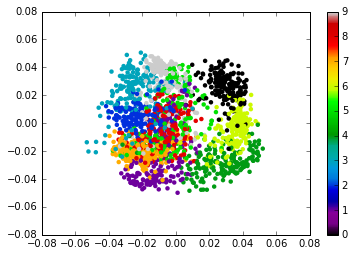

In [45]:
# ICA
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 2)
ica.fit(digits.data)
X_reduced = ica.transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap="nipy_spectral", edgecolor="None")
plt.colorbar()

Take a second to think about what ICA is doing.  What if you had digits from digital clocks instead of handwritten?

We could think about doing dimensional reduction of the digits data set in another way.  There are 64 pixels in each of our images.  Presumably all of them aren't equally useful.  Let's figure out exactly which pixels are the most relevant.  We'll use Scikit-Learn's [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).  We won't get to regression until next week, but you don't need to understand the algorithm to do this, just look at the inputs and outputs.  Which pixels are the most important?  As a bonus see if you can plot digit images with those pixels highlighted.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor()# Complete or leave blank as you see fit
# Do Fitting
importances = # Determine importances
np.argsort( # Complete to rank importances